In [7]:
from utilities import *
from group_analysis_functions import extract_data_from_csv

In [66]:
#PATH 
screening_data = '../CreateStudy/screening_data.csv'
initial_path = '../CreateStudy'
figures_path =  '../CreateStudy/group_figures'

In [9]:
data_dict = extract_data_screening_participant(screening_data)
# Access the healthy and stroke datasets separately
healthy_data = data_dict['H']
stroke_data = data_dict['S']

In [10]:
healthy_data, stroke_data

({'participant_id': array(['H001', 'H002', 'H003', 'H004', 'H005', 'H006', 'H007', 'H008',
         'H009', 'H010', 'H011', 'H012'], dtype='<U4'),
  'age': array([26, 24, 33, 55, 32, 31, 64, 55, 64, 57, 64, 57]),
  'dominant_hand': array(['right', 'right', 'right', 'right', 'right', 'right', 'right',
         'right', 'right', 'right', 'right', 'right'], dtype='<U5'),
  'affected_hand': array(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
         'None', 'None', 'None', 'None'], dtype='<U4'),
  'ARAT_score': array(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
         'None', 'None', 'None', 'None'], dtype='<U4')},
 {'participant_id': array(['S002', 'S003', 'S004'], dtype='<U4'),
  'age': array([70, 60, 29]),
  'dominant_hand': array(['right', 'right', 'right'], dtype='<U5'),
  'affected_hand': array(['left', 'left', 'right'], dtype='<U5'),
  'ARAT_score': array(['None', '3', '57'], dtype='<U4')})

In [11]:
healthy_age_array = healthy_data['age']
stroke_age_array = stroke_data['age']
stroke_arat_score = stroke_data['ARAT_score']

In [12]:
stroke_arat_score

array(['None', '3', '57'], dtype='<U4')

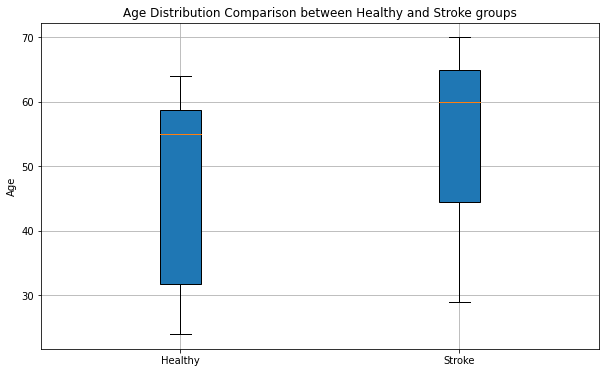

In [13]:
# Plot Boxplot
side_by_side_box_plot(healthy_age_array, stroke_age_array, labels=['H', 'S'], x_axis_labels=['Healthy', 'Stroke'])

In [14]:
## CORRELATION ## 

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def plot_spearman_correlation(array1, array2, title, path_to_save=None, alpha=0.05):
    """
    Plots a scatter plot of two arrays along with a fitted linear regression line.
    
    Args:
        array1 (numpy.ndarray): The first array of data points.
        array2 (numpy.ndarray): The second array of data points.
        title (str): The title of the plot.
        path_to_save (str, optional): Path to the directory where the plot should be saved.
                                     If None, the plot will be displayed instead.
        alpha (float, optional): The significance level for hypothesis testing (default is 0.05).
    """
    # Calculate the Spearman correlation coefficient and p-value
    correlation_coefficient, p_value = spearmanr(array1, array2)

    # Create a larger figure and axis
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Create a scatter plot
    plt.scatter(array1, array2, label=f"Spearman coefficient ρ = {correlation_coefficient:.2f}\n p-value = {p_value:.4f}")

    # Add a linear regression line
    coefs = np.polyfit(array1, array2, 1)
    line_fit = np.polyval(coefs, array1)
    plt.plot(array1, line_fit, color='red', label='Linear Fit')

    # Add labels and a legend
    plt.xlabel("Age")
    plt.ylabel("Optimal parameter")
    plt.title(title)
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

    # Save the plot if a path is provided
    if path_to_save is not None:
        plt.savefig(f"{path_to_save}/{title}.png")
        print(f"Plot saved at: {path_to_save}/{title}.png")
    else:
        # Show the plot
        plt.show()

    # Interpret the correlation coefficient and p-value
    if p_value < alpha:
        significance = "Statistically significant"
    else:
        significance = "Not statistically significant"

    if correlation_coefficient >= 0.8:
        meaning = "Very strong positive monotonic relationship"
    elif correlation_coefficient >= 0.6:
        meaning = "Strong positive monotonic relationship"
    elif correlation_coefficient >= 0.4:
        meaning = "Moderate positive monotonic relationship"
    elif correlation_coefficient >= 0.2:
        meaning = "Weak positive monotonic relationship"
    elif correlation_coefficient > -0.2:
        meaning = "Very weak or no monotonic relationship"
    elif correlation_coefficient > -0.4:
        meaning = "Weak negative monotonic relationship"
    elif correlation_coefficient > -0.6:
        meaning = "Moderate negative monotonic relationship"
    elif correlation_coefficient > -0.8:
        meaning = "Strong negative monotonic relationship"
    else:
        meaning = "Very strong negative monotonic relationship"

    print(f"The Spearman correlation coefficient is {correlation_coefficient:.2f}.")
    print(f"The p-value is {p_value:.4f}.")
    print(f"Interpretation: {meaning}.")
    print(f"Significance: {significance} at alpha = {alpha}.")

In [107]:
# For Healthy Group 
# Get the AC thresholds
participant_group = 'H'
csv_file_names = ['optimal_threshold_AC.csv', 'optimal_threshold_GM.csv']
# Get the  csv file paths for each participant 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_names, participant_group)
optimal_threshold_AC_path =  csv_files_dict['optimal_threshold_AC.csv']
optimal_threshold_GM_path = csv_files_dict['optimal_threshold_GM.csv']
# Get the optimal thresholds from the csv file paths 
group_optimal_threshold_AC_NDH, group_optimal_threshold_AC_DH = extract_data_from_csv(optimal_threshold_AC_path)
group_optimal_threshold_GM_NDH, group_optimal_threshold_GM_DH = extract_data_from_csv(optimal_threshold_GM_path)

In [108]:
csv_files_dict

{'optimal_threshold_AC.csv': ['../CreateStudy\\H001\\optimal_threshold_AC.csv',
  '../CreateStudy\\H002\\optimal_threshold_AC.csv',
  '../CreateStudy\\H003\\optimal_threshold_AC.csv',
  '../CreateStudy\\H004\\optimal_threshold_AC.csv',
  '../CreateStudy\\H005\\optimal_threshold_AC.csv',
  '../CreateStudy\\H006\\optimal_threshold_AC.csv',
  '../CreateStudy\\H007\\optimal_threshold_AC.csv',
  '../CreateStudy\\H008\\optimal_threshold_AC.csv',
  '../CreateStudy\\H009\\optimal_threshold_AC.csv'],
 'optimal_threshold_GM.csv': ['../CreateStudy\\H001\\optimal_threshold_GM.csv',
  '../CreateStudy\\H002\\optimal_threshold_GM.csv',
  '../CreateStudy\\H003\\optimal_threshold_GM.csv',
  '../CreateStudy\\H004\\optimal_threshold_GM.csv',
  '../CreateStudy\\H005\\optimal_threshold_GM.csv',
  '../CreateStudy\\H006\\optimal_threshold_GM.csv',
  '../CreateStudy\\H007\\optimal_threshold_GM.csv',
  '../CreateStudy\\H008\\optimal_threshold_GM.csv',
  '../CreateStudy\\H009\\optimal_threshold_GM.csv']}

In [109]:
group_optimal_threshold_GM_NDH, group_optimal_threshold_GM_DH

([37.0, 49.0, 53.0, 57.0, 55.0, 57.0, 55.0, 55.0, 75.0],
 [59.0, 47.0, 69.0, 69.0, 49.0, 65.0, 41.0, 55.0, 69.0])

In [110]:
group_optimal_threshold_AC_NDH, group_optimal_threshold_AC_DH

([2.4, 13.5, 26.38, 169.86, 25.01, 64.31, 107.3, 33.46, 17.96],
 [17.41, 4.0, 1.6, 0.0, 7.67, 4.41, 121.3, 69.68, 1.6])

In [111]:
## FIX THIS ## 
# Remove the last element since analysis not done yet
healthy_age_array_temp = healthy_age_array[:-3]

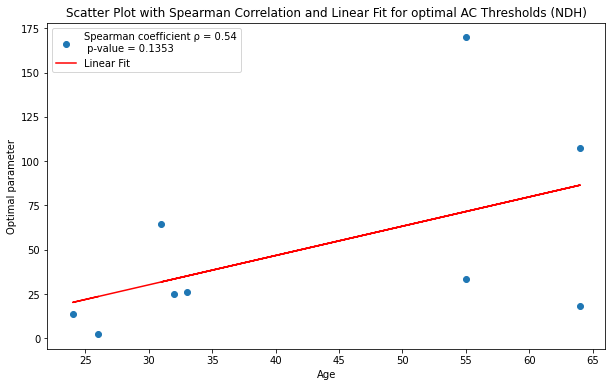

The Spearman correlation coefficient is 0.54.
The p-value is 0.1353.
Interpretation: Moderate positive monotonic relationship.
Significance: Not statistically significant at alpha = 0.05.


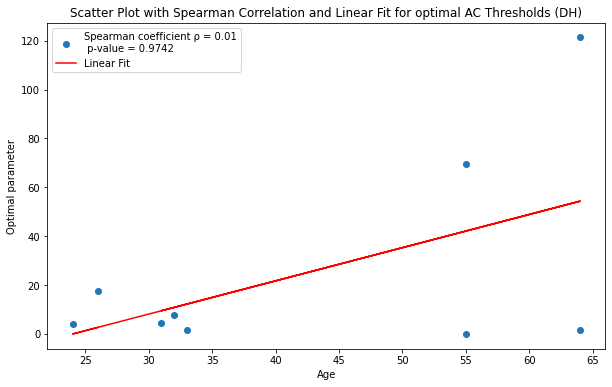

The Spearman correlation coefficient is 0.01.
The p-value is 0.9742.
Interpretation: Very weak or no monotonic relationship.
Significance: Not statistically significant at alpha = 0.05.


In [112]:
# Plot correlation figures between AC thresholds and age
plot_spearman_correlation(healthy_age_array_temp, group_optimal_threshold_AC_NDH, "Scatter Plot with Spearman Correlation and Linear Fit for optimal AC Thresholds (NDH)")
plot_spearman_correlation(healthy_age_array_temp, group_optimal_threshold_AC_DH, "Scatter Plot with Spearman Correlation and Linear Fit for optimal AC Thresholds (DH)")

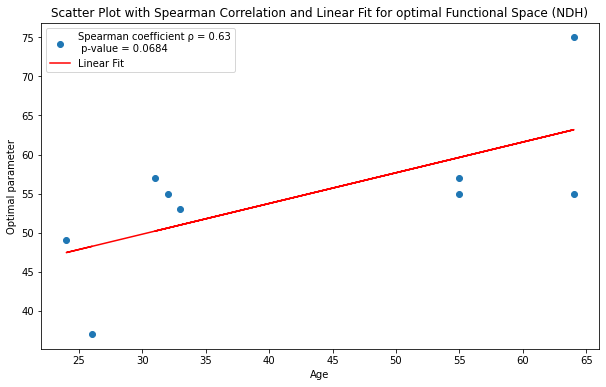

The Spearman correlation coefficient is 0.63.
The p-value is 0.0684.
Interpretation: Strong positive monotonic relationship.
Significance: Not statistically significant at alpha = 0.05.


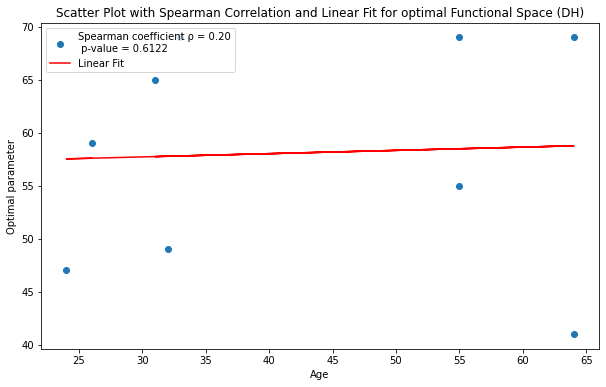

The Spearman correlation coefficient is 0.20.
The p-value is 0.6122.
Interpretation: Very weak or no monotonic relationship.
Significance: Not statistically significant at alpha = 0.05.


In [114]:
# Plot correlation figures between FS thresholds and age
plot_spearman_correlation(healthy_age_array_temp, group_optimal_threshold_GM_NDH, "Scatter Plot with Spearman Correlation and Linear Fit for optimal Functional Space (NDH)")
plot_spearman_correlation(healthy_age_array_temp, group_optimal_threshold_GM_DH, "Scatter Plot with Spearman Correlation and Linear Fit for optimal Functional Space (DH)")

In [90]:
# For Stroke Group 
# Get the AC thresholds
participant_group = 'S'
csv_file_names = ['optimal_threshold_AC.csv', 'optimal_threshold_GM.csv']
# Get the  csv file paths for each participant 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_names, participant_group)
stroke_optimal_threshold_AC_path =  csv_files_dict['optimal_threshold_AC.csv']
stroke_optimal_threshold_GM_path = csv_files_dict['optimal_threshold_GM.csv']
# Get the optimal thresholds from the csv file paths 
stroke_group_optimal_threshold_AC_NDH, stroke_group_optimal_threshold_AC_DH = extract_data_from_csv(stroke_optimal_threshold_AC_path)
stroke_group_optimal_threshold_GM_NDH, stroke_group_optimal_threshold_GM_DH = extract_data_from_csv(stroke_optimal_threshold_GM_path)

In [91]:
stroke_optimal_threshold_AC_path, stroke_optimal_threshold_GM_path

(['../CreateStudy\\S002\\optimal_threshold_AC.csv'],
 ['../CreateStudy\\S002\\optimal_threshold_GM.csv'])

In [92]:
stroke_group_optimal_threshold_AC_NDH, stroke_group_optimal_threshold_AC_DH

([112.25], [90.17])

In [93]:
stroke_group_optimal_threshold_GM_NDH, stroke_group_optimal_threshold_GM_DH 

([55.0], [51.0])

In [41]:
# To test 
stroke_group_optimal_threshold_AC_NDH = stroke_group_optimal_threshold_AC_DH = [45,41,68]

In [42]:
stroke_age_array

array([70, 60, 29])

Correlation is not statistically significant (p >= 0.05)


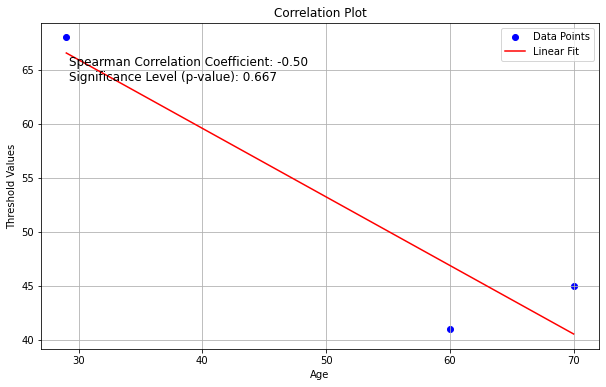

Correlation is not statistically significant (p >= 0.05)


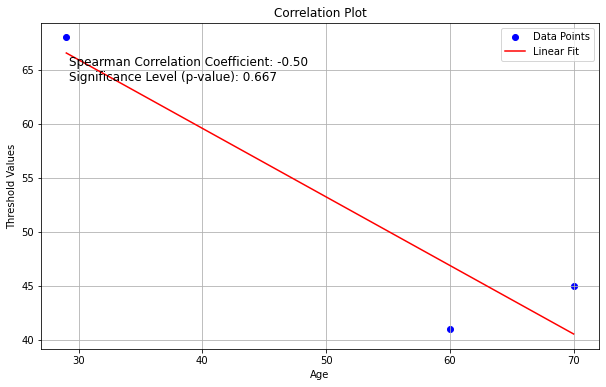

In [43]:
# Plot correlation between AC thresholds and age  
plot_spearman_correlation(stroke_age_array, stroke_group_optimal_threshold_AC_NDH, x_value='Age')
plot_spearman_correlation(stroke_age_array, stroke_group_optimal_threshold_AC_DH, x_value='Age')
# plot_spearman_correlation(stroke_arat_score, stroke_group_optimal_threshold_AC_DH, x_value='ARAT Score')
# plot_spearman_correlation(stroke_arat_score, stroke_group_optimal_threshold_AC_NH, x_value='ARAT Score')